In [2]:
# JMJ+

### Problem Statement:

* Use clustering technique to identify similar companies, job profiles, compensation and other related parameters

* Help match the right companies along with the expected salaries and job profile to the learners so as to present the right career trajectory post the course completion in Scaler Academy


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [4]:
path=r'C:\Users\Alfred Paul\OneDrive\Desktop\Scaler_CaseStudies\JMJ_Scaler\JMJ_scaler_clustering.csv'

In [5]:
df=pd.read_csv(path)

In [6]:
# Checking the first few elements:

df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [7]:
# Checking the shape:

df.shape

(205843, 7)

In [8]:
# Basic info:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


Observations:

* Null values exist in different columns
* Data types are: int, float and object

In [9]:
# Checking for null values:

df.isna().sum()

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

Null values exist for some featues and requires null handling techniques 

In [10]:
# Dropping the feature 'Unnamed: 0' as it is redundant

df.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
# Checking the duplicate rows

df.duplicated().sum()


33

In [12]:
# Removing the duplicates:

df.drop_duplicates(inplace=True)

##### Statistical summary:

In [14]:
df.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,orgyear,ctc,ctc_updated_year
count,205724.000,205810.000,205810.000
mean,2014.882,2271853.647,2019.628
std,63.576,11801845.290,1.325
min,0.000,2.000,2015.000
25%,2013.000,530000.000,2019.000
50%,2016.000,950000.000,2020.000
75%,2018.000,1700000.000,2021.000
max,20165.000,1000150000.000,2021.000


##### Observations:

* Some errors can be observed in 'orgyear' wrto min and max values
* Similar errors can be observed in ctc as well
* These features require further techniques for rectification

In [15]:
df.describe(include='object').transpose()

,count,unique,top,freq
company_hash,205766,37299,nvnv wgzohrnvzwj otqcxwto,8337
email_hash,205810,153443,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,10
job_position,153263,1017,Backend Engineer,43546


##### Observations:

* Some companies have a high proportion compared to others
* There are repeated email_hash and company hash
* Most frequent job position is Backend Engineer


### Basic feature engineering:

In [16]:
# Replacing null 'company_hash' with 'others'

df['company_hash'].fillna('others',inplace=True)

##### Converting the 'ctc' into lakhs (10^5)

In [17]:
def salary_convert(i):
    salary=np.round((i/pow(10,5)),3)
    return salary

In [18]:
df['CTC_lakhs']=df['ctc'].apply(salary_convert)

In [19]:
df['CTC_lakhs'].describe()

count    205810.000000
mean         22.718537
std         118.018453
min           0.000000
25%           5.300000
50%           9.500000
75%          17.000000
max       10001.500000
Name: CTC_lakhs, dtype: float64

##### Observation

- Mean salary ~22L INR
- Data contains outliers(extreme values in upper and lower end), that needs to be treated

In [20]:
# dropping 'ctc'

df.drop(columns=['ctc'],inplace=True)

##### Plotting the distplot and boxplot to study the distribution of ctc:

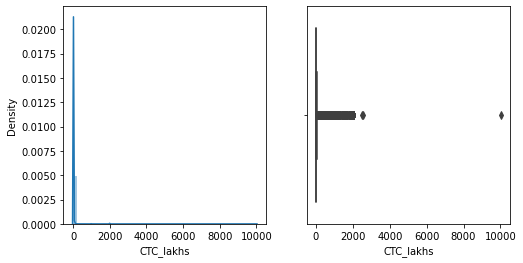

In [21]:
fig=plt.figure(figsize=(8,4))

ax1=fig.add_subplot(1,2,1)
ax1=sns.distplot(x=df['CTC_lakhs'])
ax1.set_xlabel('CTC_lakhs')

ax2=fig.add_subplot(1,2,2)
ax1=sns.boxplot(x=df['CTC_lakhs'])
ax1.set_xlabel('CTC_lakhs')

plt.show()


- Compensation is highly skewed and the outliers needs to be clipped

In [22]:
a=df['CTC_lakhs'].fillna(0).astype(int).unique().tolist()

##### Studying the percentile values of compensation

In [23]:
# Checking the 99.3 percentile of the 'CTC_lakhs'

q1=df['CTC_lakhs'].quantile(0.993)
q1

508.67399999999907

In [24]:
#  Checking the 3rd percentile of the 'CTC_lakhs'

q2=df['CTC_lakhs'].quantile(0.03)
q2

1.1

### Note!!!

Salaries above  ~508 lakhs and below 1.1 lakhs are condidered as outliers due to the practical difficulty in achieving the same.

Hence these points are removed

In [25]:
# Checking the count of observations below the lower limit
print(f"Count of observations below the lower limit: {len(df[df['CTC_lakhs']<q2])}")

# Checking the count of observations above the upper limit
print(f"Count of observations above the upper limit: {len(df[df['CTC_lakhs']>q1])}")

Count of observations below the lower limit: 6037
Count of observations above the upper limit: 1441


In [26]:
# Updating the dataset based on quantile clipping:

df=df[(df['CTC_lakhs']>q2) & (df['CTC_lakhs']<q1)]

##### Filling the null values of  'orgyear' based on 'ctc_updated_year'

In [27]:
# Creating dictionary to store the median 'orgyear' 
# corresponding to each 'ctc_updated_year'

x=df.groupby(by='ctc_updated_year').median()['orgyear'].to_dict()

In [29]:
df['orgyear'].fillna(df['ctc_updated_year'].map(x),inplace=True)

In [30]:
# Extracting all the unique and sorted 'orgyear':

join_years = sorted(df['orgyear'].unique())

In [189]:
join_years

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 38.0,
 83.0,
 91.0,
 200.0,
 201.0,
 206.0,
 208.0,
 209.0,
 1900.0,
 1970.0,
 1971.0,
 1972.0,
 1976.0,
 1977.0,
 1979.0,
 1982.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0,
 2020.0,
 2021.0,
 2022.0,
 2023.0,
 2024.0,
 2025.0,
 2026.0,
 2027.0,
 2028.0,
 2029.0,
 2031.0,
 2101.0,
 2106.0,
 2107.0,
 2204.0,
 20165.0]

##### Observation:

    - Lot of the values are irrelevant(orgyear<1975 and orgyear>2022)
    - Such values needs to be removed

In [32]:
join_years_final=[]
for i in range(len(join_years)):
    if(join_years[i]>2022):
        join_years_final.append(join_years[i])
    elif(join_years[i]<1975):
        join_years_final.append(join_years[i])
    

In [33]:
df = df[~df['orgyear'].isin(join_years_final)]

In [34]:
# Further checking the count of null values

df.isnull().sum()

company_hash            0
email_hash              0
orgyear                 0
job_position        50860
ctc_updated_year        0
CTC_lakhs               0
dtype: int64

### Note!!!

    - From the given data, Years of experience = ctc_updated_year - orgyear
    
    - Ideally orgyear(employment sart year) should be lower than ctc_updated_year
    
    - However, in contrast there are many rows in which Years of experience is negative, i.e. 
    orgyear > ctc_updated_year
    
    - This should be handled, so as to prevent experience from being negative      
    

In [36]:
# Count of cells in which experience is negative

df[df['ctc_updated_year']<df['orgyear']]['orgyear'].count() 

7884

In [37]:
# Taking the groupby based on 'ctc_updated_year' and 
# finding the corresponding median 'orgyear'

y=df.groupby(by='ctc_updated_year').median()['orgyear'].to_dict()

In [38]:
# Replacing with the median value of 'orgyear' corresponding to the 'ctc_updated_year'
# wherever the experience is negative

df['orgyear']=np.where((df['ctc_updated_year']-df['orgyear'])<0,
                       (df['ctc_updated_year'].map(y)), 
                       df['orgyear'])

In [39]:
# Cross checking the experience for any negative values

df[df['ctc_updated_year']<df['orgyear']]['orgyear'].count() 

0

In [40]:
# Creating the feaure 'experience'

df['exp_years']=df['ctc_updated_year']-df['orgyear']

In [41]:
# Statistical check for 'exp_years

df['exp_years'].describe()

count    197812.000000
mean          4.701651
std           3.970875
min           0.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          44.000000
Name: exp_years, dtype: float64

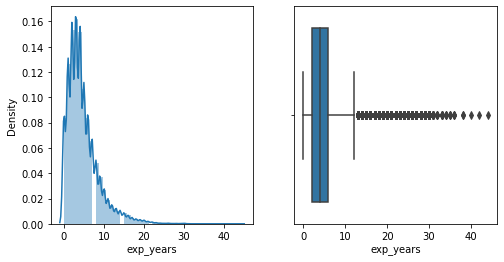

In [42]:
# Studying the spread of 'exp_years'

fig=plt.figure(figsize=(8,4))

ax1=fig.add_subplot(1,2,1)
ax1=sns.distplot(x=df['exp_years'])
ax1.set_xlabel('exp_years')

ax2=fig.add_subplot(1,2,2)
ax1=sns.boxplot(x=df['exp_years'])
ax1.set_xlabel('exp_years')

plt.show()

### Handling job position:

    - There are ~863 job titles and many of them are redundant
    - They need to be processed so that clustering becomes more accurate
    
##### Methodology:

    - All the unique job positions are extracted and dictionary is made using the available job position and the updated job position
    
    - Then, this dictionary is used to map the exising job positions to give more meaningful job profiles

In [45]:
# Bringing all the job_position to lower case 

df['job_position']=df['job_position'].apply(lambda x:str(x).strip().lower())

In [46]:
# Preparing the list of the existing job_position

job_title = df['job_position'].unique().tolist()

In [47]:
job_title

['other',
 'fullstack engineer',
 'backend engineer',
 'nan',
 'ios engineer',
 'data analyst',
 'frontend engineer',
 'qa engineer',
 'engineering leadership',
 'data scientist',
 'engineering intern',
 'android engineer',
 'research engineers',
 'sdet',
 'support engineer',
 'security leadership',
 'devops engineer',
 'product manager',
 'program manager',
 'co-founder',
 'member of technical staff 3',
 'product designer',
 'system engineer',
 'backend architect',
 'database administrator',
 'senior  software engineer',
 'release engineer',
 'ase',
 'non coder',
 'trainer',
 'associate consultant',
 'administrator',
 'software development engineer 2',
 'sr.',
 'sr. executive',
 'software engineer (android)',
 'tool room engineer, mechanical engineer',
 'senior data scientist',
 'sde 2',
 'project engineer',
 'mean stack developer',
 'software development engineer - i',
 'sde-3',
 'digital marketing',
 'app developer',
 'principal consultant',
 'business analyst / product owner',
 'se

In [48]:
# Count of existing job_position

len(job_title)

863

In [49]:
df.duplicated().sum()

103

In [50]:
# Removing duplicated rows

df.drop_duplicates(inplace=True)

##### Uploading the updated job position

In [52]:
path2=r'C:\Users\Alfred Paul\OneDrive\Desktop\Scaler_CaseStudies\JMJ_Scaler\Book1.csv'

In [53]:
df_job_title=pd.read_csv(path2)

In [54]:
df_job_title

,job_position,updated-job_position
0,other,other
1,fullstack engineer,fullstack engineer
2,backend engineer,backend engineer
3,ios engineer,application developer
4,data analyst,data analyst
...,...,...
857,data/product engineer,data engineer1
858,applied scientist,applied scientist
859,member technical staff iii,mts3
860,web / ui designer,application developer


In [55]:
df_job_title.isnull().sum()

job_position              0
updated-job_position    265
dtype: int64

In [56]:
# Filling the null values of 'updated-job_position' with 'other'

df_job_title['updated-job_position'].fillna('other',inplace=True)


In [57]:
# Stripping the extra spaces

df_job_title['job_position']=df_job_title['job_position'].str.strip()

In [58]:
# Stripping the extra spaces

df_job_title['updated-job_position']=df_job_title['updated-job_position'].str.strip()

In [61]:
# Creating a dictionary of the all the job_titles along with their updated titles

d = dict(df_job_title.values)


In [62]:
d

{'other': 'other',
 'fullstack engineer': 'fullstack engineer',
 'backend engineer': 'backend engineer',
 'ios engineer': 'application developer',
 'data analyst': 'data analyst',
 'frontend engineer': 'application developer',
 'qa engineer': 'sde test',
 'engineering leadership': 'engineering manager',
 'data scientist': 'data scientist',
 'engineering intern': 'intern',
 'android engineer': 'application developer',
 'research engineers': 'research engineer',
 'sdet': 'sde test',
 'support engineer': 'support engineer',
 'security leadership': 'management',
 'devops engineer': 'application engineer',
 'product manager': 'manager',
 'program manager': 'manager',
 'co-founder': 'leadership',
 'member of technical staff 3': 'mts3',
 'product designer': 'sde1',
 'system engineer': 'sde1',
 'backend architect': 'architect',
 'database administrator': 'other',
 'senior  software engineer': 'SDE3',
 'release engineer': 'other',
 'ase': 'other',
 'non coder': 'other',
 'trainer': 'other',
 'a

In [63]:
# Mapping the existing job titles with the updated job titles

df['job_position'] = df['job_position'].map(d)

In [64]:
# Checking the count of unique job titles after updation 

len(df['job_position'].unique())

78

##### NOTE!

- The count of unique job title has been reduced to 78 from 863 after the correct grouping of similar job titles

### Feature engineering : to create flags(Designation, Flag and Tier)

##### Feature engineering : to create Tier

In [68]:
# At company level:

df1=df[['company_hash','CTC_lakhs']].groupby('company_hash').describe().reset_index()

In [73]:
# To align the column names correctly

grp=['company_hash']
df1.columns = ["{}".format(b_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(df1.columns.droplevel(1), df1.columns.droplevel(0))] 

In [75]:
# Merging with the initial dataset

df1=pd.merge(df,df1,how='inner',on='company_hash')

In [79]:
# Creating the flag 'Tier based on percentile values

col1='75%'
col2='50%'
col3='25%' 
col4='CTC_lakhs'

conditions=[df1[col4]>=df1[col1], ((df1[col4]>=df1[col2])&(df1[col4]<df1[col1])), df1[col4]<df1[col2]]

choice=[1,2,3]

df1['Tier'] = np.select(conditions, choice, default=np.nan)

In [80]:
df1['Tier'].value_counts(normalize=True)

1.0    0.401691
3.0    0.392714
2.0    0.205595
Name: Tier, dtype: float64

### Question:

##### Top 10 employees (earning more than most of the employees in the company) - Tier 1

In [81]:
df1[df1['Tier']==1].sort_values('CTC_lakhs',ascending=False).head(10)[['company_hash','CTC_lakhs','exp_years']]

,company_hash,CTC_lakhs,exp_years
101751,vqcxza evoyxgz,508.0,3.0
75797,atrgxnnt ho xzaxv,506.5,1.0
36574,ozvuatvr,506.2,6.0
3547,wgszxkvzn,506.0,5.0
152803,moab,506.0,3.0
152688,nqht mtto,506.0,7.0
4342,wgszxkvzn,506.0,5.0
149597,lpb tzsxzttqo ucn rna,506.0,2.0
144002,zgn vuurxwvmrt,505.0,3.0
40601,nvnv wgzohrnvzwj otqcxwto,503.3,0.0


### Question:

##### Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [82]:
df1[df1['Tier']==3].sort_values('CTC_lakhs',ascending=True).head(10)[['company_hash','CTC_lakhs','exp_years']]

,company_hash,CTC_lakhs,exp_years
152959,tlvav,1.104,2.0
135429,ovu ohwwtooevwngqo,1.105,3.0
21396,xzegojo,1.110,1.0
157487,tuxw,1.110,3.0
17363,tmvj,1.110,5.0
11122,xzntr wgqugqvnxgz,1.110,4.0
17375,tmvj,1.110,5.0
17391,tmvj,1.110,5.0
157496,tuxw,1.110,0.0
134401,bvsxw rtvu,1.110,4.0


##### Top 10 companies (based on their CTC)

In [83]:
df1.groupby(by='company_hash').median().reset_index().sort_values('CTC_lakhs',ascending=False).head(10)[['company_hash','CTC_lakhs']]

,company_hash,CTC_lakhs
10016,moab,506.0
11497,nqht mtto,506.0
9418,lpb tzsxzttqo ucn rna,506.0
21974,tqs,500.0
16056,ovwyxz,500.0
10008,mno axsxnvr,500.0
16696,oyqvcvz ohqjcvzoyx,500.0
17064,phtopx,500.0
3124,bvszxexw mhxratqo xzntqxgqo,500.0
13985,ogzv bgntqo,500.0


##### Top 2 positions in every company (based on their CTC)

In [84]:
df_top2 = df1[(df1['job_position'] != 'other')&(df1['job_position'] != 'others')]
df_top2 = df_top2.groupby(by=['company_hash','job_position']).median().reset_index().sort_values(['company_hash','CTC_lakhs'],ascending=False)
df_top2 = df_top2.groupby(by='company_hash').head(2).reset_index()[['company_hash','job_position']]
df_top2

,company_hash,job_position
0,zzb ztdnstz vacxogqj ucn rna,fullstack engineer
1,zyvzwt wgzohrnxzs tzsxzttqo,application developer
2,zyuw rxbxnta,application developer
3,zxzvzxjv sqghu,engineering manager
4,zxzvnxgzvr xzonqhbtzno,application engineer
...,...,...
35632,10,backend engineer
35633,1 jtvq,backend engineer
35634,1 axsxnvro,backend engineer
35635,05mz exzytvrny uqxcvnt rxbxnta,backend engineer


In [85]:
df1['job_position'].replace('others','other',inplace=True)

##### Feature engineering : to create Class

In [87]:
condition2=['company_hash','job_position']
df2=df[['company_hash','job_position','CTC_lakhs']].groupby(by=condition2).describe().reset_index()

##### Feature engineering : to create Designation

In [88]:
condition3=['company_hash','job_position','exp_years']
df3=df[['company_hash','job_position','exp_years','CTC_lakhs']].groupby(by=condition3).describe().reset_index()

In [91]:
df_dct=df1.copy()

In [93]:
# Dropping redundant features

df_dct.drop(columns=['count', 'mean', 'std','min', '25%', '50%', '75%', 'max'],inplace=True)

In [94]:
# To align the column names correctly

df2.columns = ["{}".format(b_) if a_ not in condition2 else "{}".format(a_) for a_,b_ in zip(df2.columns.droplevel(1),df2.columns.droplevel(0))]

In [96]:
# Merging with the initial dataset

df_dct= df_dct.merge(df2,on=condition2,how='inner')

In [98]:
# Creating the flag 'Class' based on percentile values

col1='75%'
col2='50%'
col3='25%' 
col4='CTC_lakhs'

conditions=[df_dct[col4]>=df_dct[col1], ((df_dct[col4]>=df_dct[col2])&(df_dct[col4]<df_dct[col1])), df_dct[col4]<df_dct[col2]]

choice=[1,2,3]

df_dct['Class'] = np.select(conditions, choice, default=np.nan)

In [100]:
# Dropping redundant features

df_dct.drop(columns=['count', 'mean', 'std','min', '25%', '50%', '75%', 'max'],inplace=True)

In [103]:
# To align the column names correctly (for flag : 'Designation')

df3.columns = ["{}".format(b_) if a_ not in condition3 else "{}".format(a_) for a_,b_ in zip(df3.columns.droplevel(1),df3.columns.droplevel(0))]

In [105]:
# Merging with the initial dataset

df_dct= df_dct.merge(df3,on=condition3,how='inner')

In [107]:
# Creating the flag 'Designation' based on percentile values

col1='75%'
col2='50%'
col3='25%' 
col4='CTC_lakhs'

conditions=[df_dct[col4]>=df_dct[col1], ((df_dct[col4]>=df_dct[col2])&(df_dct[col4]<df_dct[col1])), df_dct[col4]<df_dct[col2]]

choice=[1,2,3]

df_dct['Designation'] = np.select(conditions, choice, default=np.nan)

In [109]:
# Dropping redundant features

df_dct.drop(columns=['count', 'mean', 'std','min', '25%', '50%', '75%', 'max'],inplace=True)

### Question

##### Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1


In [111]:
data_roles = ['data scientist','data analyst','data scientist2','data engineer','data engineer1','data engineer2','data engineer3','data scientist1','data analayst','manager data','data engineer 2','ml engineer','ml engineer3']

In [112]:
df_dct[(df_dct['Tier']==1)&(df_dct['Class']==1)&(df_dct['job_position'].isin(data_roles))].sort_values('CTC_lakhs',ascending=False).head(10)[['company_hash','job_position','CTC_lakhs']]

,company_hash,job_position,CTC_lakhs
97845,btax vooxon xzaxv ucn rna,data analyst,500.0
37781,bgqsvz onvzrtj,data scientist,500.0
111175,tlvav,data scientist,500.0
91208,orp ogenfvqt,data analyst,404.2
39758,vwwtznhqt,data analyst,400.0
109345,eqvzprxz ntburtngz xzctonbtzno,data analyst,321.0
28236,nvnv wgzohrnvzwj otqcxwto,data analyst,293.0
4953,wxnx,data scientist,242.0
46454,bxwqgogen,data scientist,225.0
141351,yxsyrvzao xzeg ntwy ucnrna,data analyst,220.0


### Question:

##### Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3

In [113]:
df_dct[(df_dct['Tier']==1)&(df_dct['Class']==3)&(df_dct['job_position'].isin(data_roles))].sort_values('CTC_lakhs',ascending=True).head(10)[['company_hash','job_position','CTC_lakhs']]

,company_hash,job_position,CTC_lakhs
100514,vbtqxwvz tduqtoo smn,data analyst,3.0
100494,nyt ouvqpo eghzavnxgz,data scientist,6.0
1800,ztfstz ogenfvqt,data scientist,7.8
76241,vqnxcvnxwvx,data scientist,8.0
1801,ztfstz ogenfvqt,data scientist,8.0
65634,zthatoxw,data scientist,8.0
116964,pcvznhb xzw,data scientist,8.0
74943,whmvonxgz wgzohrnxzs ucn rna,data analyst,8.8
48678,ntrtutqegqbvzwt,data scientist,9.0
74416,hztburgjta,data scientist,9.8


### Question
##### Top 10 employees in vbvkgz- X department - having 5/6/7 years of experience earning more than their peers - Tier X

In [114]:
df_dct[(df_dct['exp_years'].isin([5,6,7]))&(df_dct['company_hash'].isin(['vbvkgz']))&(df_dct['Tier'] == 1)].sort_values('CTC_lakhs',ascending=False).head(10)[['email_hash','CTC_lakhs']]

,email_hash,CTC_lakhs
19668,cef944272e0b49a9d89095971254ce349002afdab382a7...,180.0
20183,dca6680a39ee2a0d9e8d31e2bd3f9b44d85cb40f67ca06...,147.0
20847,89786e81708a0764cd0a336ff3aaff4c4cb4e76a31d3c2...,140.0
19662,89786e81708a0764cd0a336ff3aaff4c4cb4e76a31d3c2...,140.0
19583,a6b81591739d0b5860e9d2ec124b7872e0bd76de858420...,138.0
19125,ee72941e60f3c8b6144bd387fdbfa8c86d0d8f38367b85...,125.0
20962,40a415ae6cd1eba19ac74f88dc2f0b7e19f398092236ee...,109.0
20179,d79750a6e478c10fdf02d8aac3fbe6dfc2281b5cb6f40a...,102.0
20786,9dcb454ec1a28ebef40e5341bce563e87ab91d786d3ab6...,100.0
19656,3ff2bb077e098d21c51f83775747240ceca4e658eaa0d5...,100.0


### Univariate Analysis:

In [116]:
# Function for creating the stacked box plot and distplot
def dist_box(data):

 Name=data.name.upper()
 sns.set(style='darkgrid')
 fig,(ax_box,ax_dist)=plt.subplots(2,sharex=True,
 gridspec_kw={'height_ratios':(0.25,0.75)},
 figsize=(7,7))

 mean=data.mean()
 median = data.median()
 mode = data.mode().tolist()[0]

 fig.suptitle('\n Spread of data for: '+Name, fontsize=17, fontweight = 'bold')

 sns.boxplot(x=data, showmeans=True, orient='h', color='violet', ax=ax_box)
 ax_box.set(xlabel='')

 sns.distplot(data, ax=ax_dist, kde=True, color='blue')

 ax_dist.axvline(mean, color='r', linestyle='--', linewidth=2)
 ax_dist.axvline(mean, color='g', linestyle='-', linewidth=2)
 ax_dist.axvline(mean, color='b', linestyle='--', linewidth=2)

 plt.legend({'Mean':mean, 'Median':median, 'Mode':mode})
 plt.show()

In [117]:
num_cols = ['CTC_lakhs', 'exp_years'] 

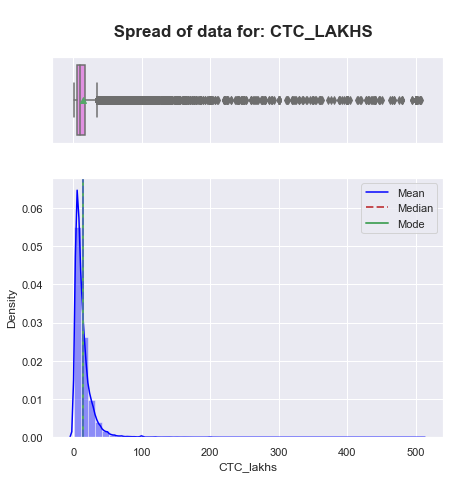

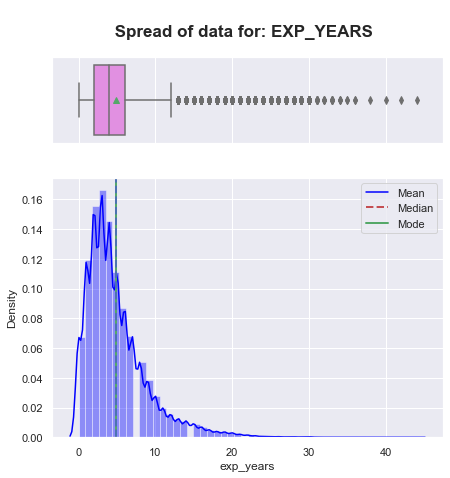

In [118]:
for i in range(len(num_cols)):
 dist_box(df_dct[num_cols[i]])

In [120]:
cat_cols = ['company_hash','job_position','CTC_lakhs', 'exp_years', 'Tier', 'Class','Designation']

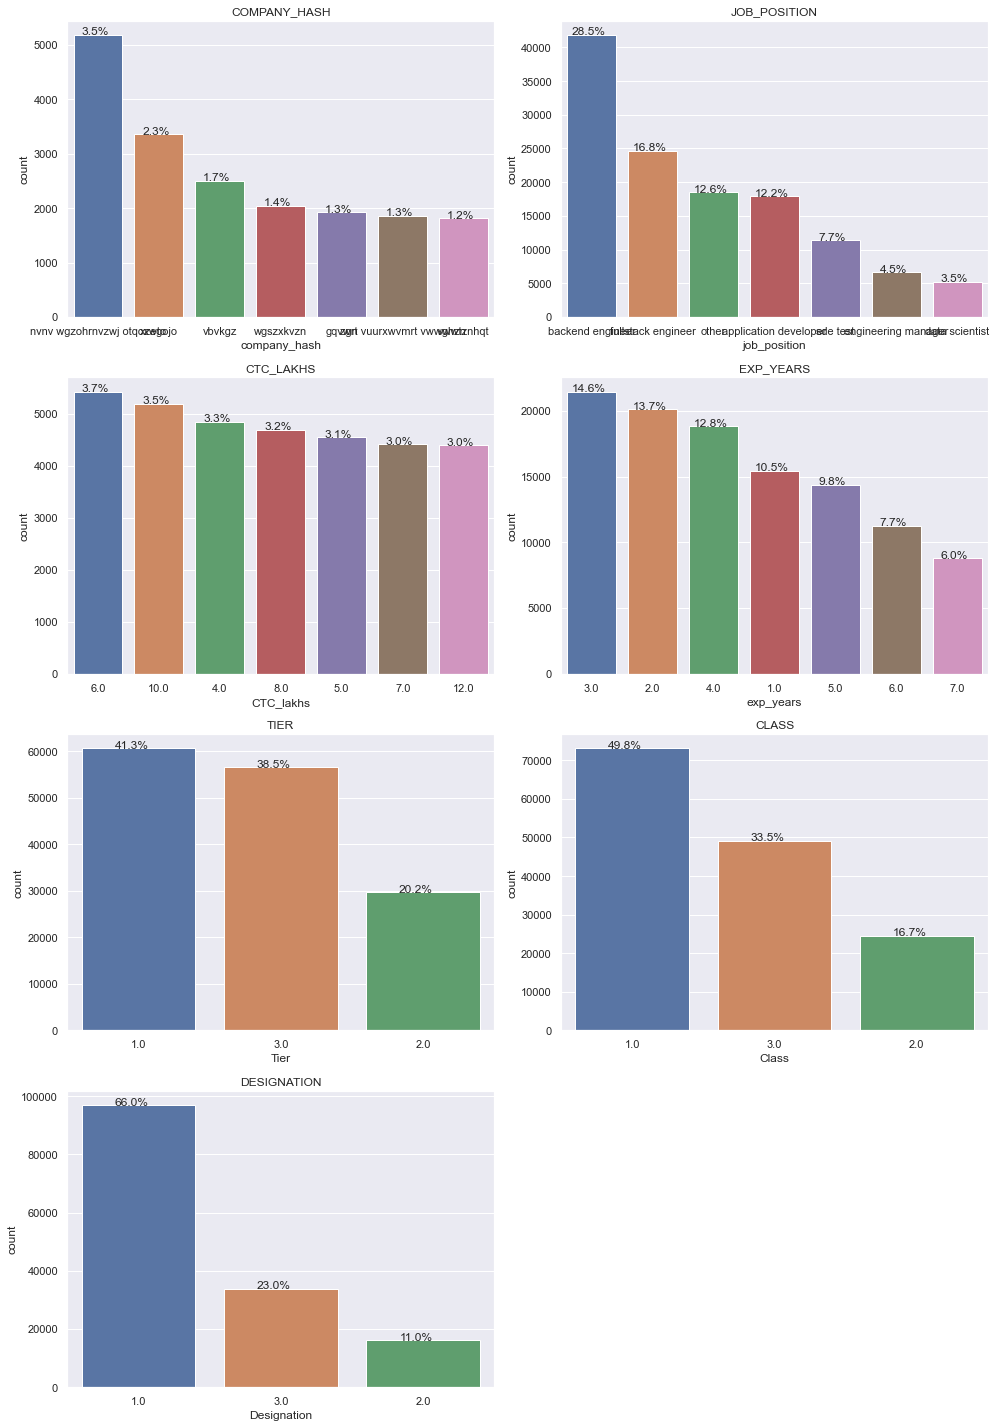

In [121]:
# Code snippet to create count plot for the categorical features:

cat_cols
title=['company_hash','job_position','CTC_lakhs', 'exp_years', 'Tier', 'Class','Designation']

plt.figure(figsize=(14,20))
sns.set(style='darkgrid')

for i, variable in enumerate(cat_cols):
    plt.subplot(4,2,i+1)
    ax=sns.countplot(x=df_dct[variable], data=df_dct,  
                     order=df_dct[variable].value_counts(ascending=False).iloc[:7].index)
    
    for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_dct[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
    plt.tight_layout()
    plt.title(title[i].upper())

##### Observations based on univariate analysis:

1. 'CTC_lakhs' and 'exp_years' are highly skewed and need further processing
2. Most of the professionals have the job designation such as 'backend engineer','full stack engineer', 'application developer' and so on

3. Majority of the candidates belong to the CTC bracket of 6 to 12 LPA

4. Most of the professional have a experience of 1-4 years

5. Around 41% of the candidates belong to Tier 1 (Earning more than 75 percentile of the peers in the same company)

6. Around 50% of the candidates belong to Class 1 (Earning more than 75 percentile of the peers in the same company with similar job profile)

7. Around 66% of the candidates belong to Designation 1 (Earning more than 75 percentile of the peers in the same company with similar job profile and year of experience)

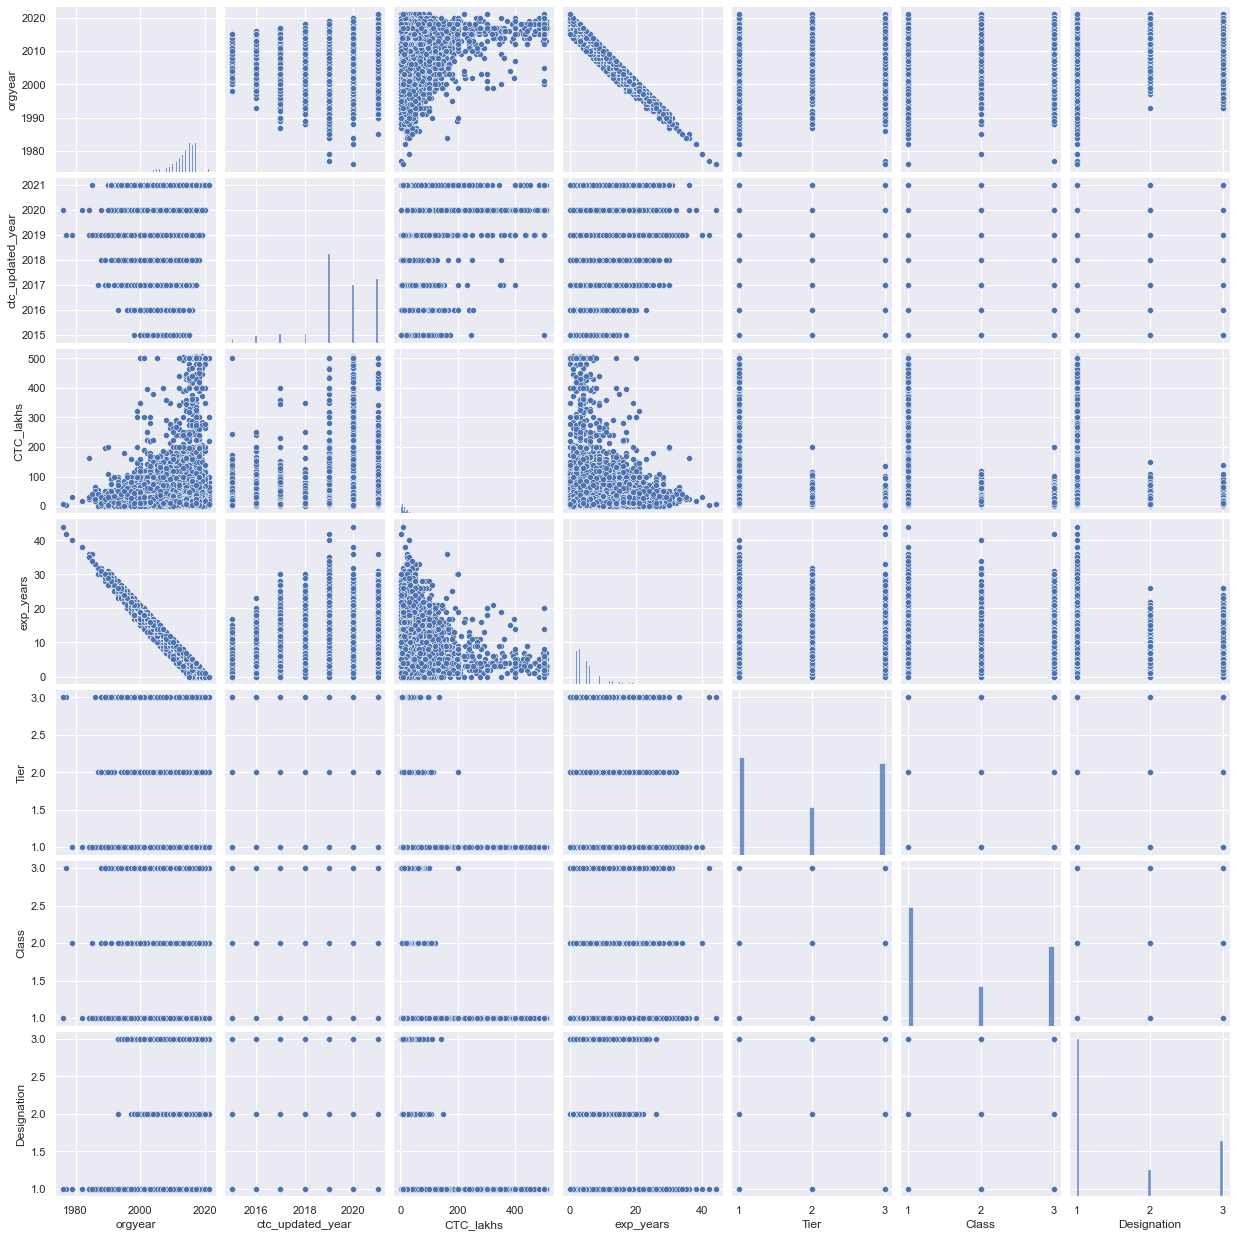

In [122]:
# Creating the pair plot

sns.pairplot(df_dct)

##### Bivariate analysis for numerical features:

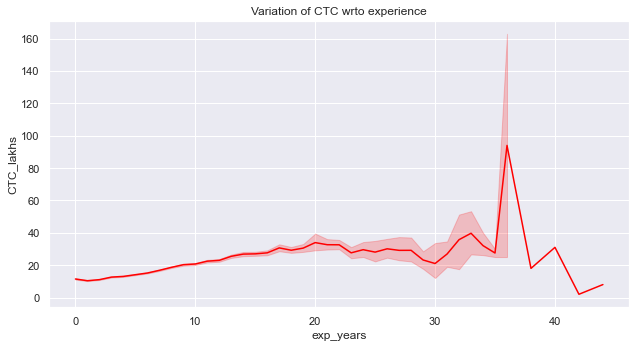

In [125]:
# Line plot to study the variation of CTC wrto experience

plt.figure(figsize=(9,5))
sns.lineplot(data=df_dct,x='exp_years',y='CTC_lakhs',color = 'red')
plt.title('Variation of CTC wrto experience')
plt.tight_layout()
plt.show()


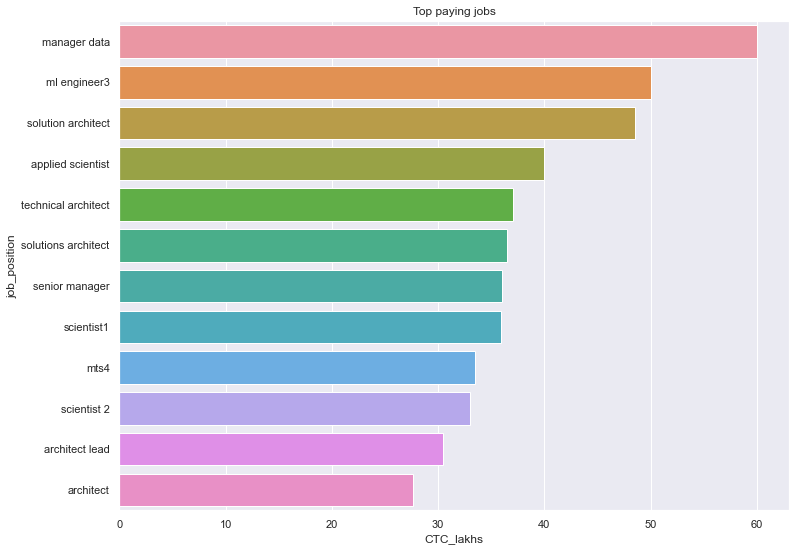

In [183]:
# Top paying jobs:

df_mv=df_dct.copy()

df_mv = df_mv.groupby(by='job_position').median()['CTC_lakhs'].reset_index().sort_values('CTC_lakhs',ascending=False).head(12)

plt.figure(figsize=(12,9))

sns.barplot(data=df_mv, x='CTC_lakhs', y='job_position').set(title='Top paying jobs')

plt.show()

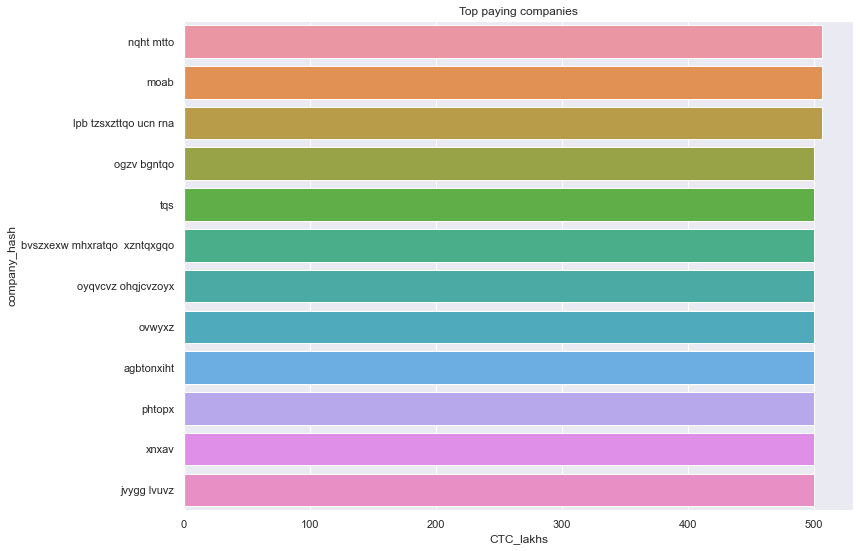

In [184]:
# Top paying companies:

df_mv=df_dct.copy()

df_mv = df_mv.groupby(by='company_hash').median()['CTC_lakhs'].reset_index().sort_values('CTC_lakhs',ascending=False).head(12)

plt.figure(figsize=(12,9))

sns.barplot(data=df_mv, x='CTC_lakhs', y='company_hash').set(title='Top paying companies')

plt.show()

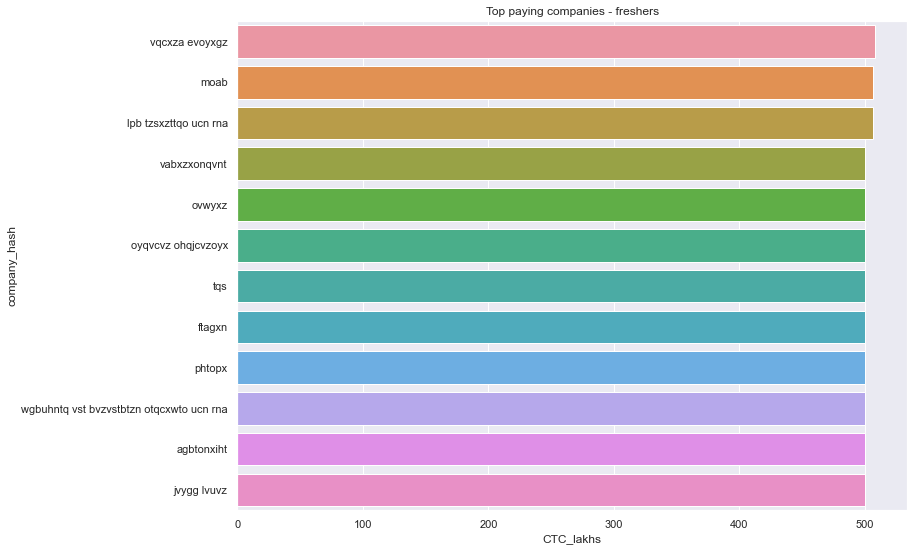

In [186]:
# Top paying companies for freshers

df_mv_freshers=df_dct.copy()

condition_freshers=[0,1,2,3]

df_mv_freshers = df_mv_freshers[df_mv_freshers['exp_years'].isin(condition_freshers)]

df_mv_freshers = df_mv_freshers.groupby(by='company_hash').median()['CTC_lakhs'].reset_index().sort_values('CTC_lakhs',ascending=False).head(12)

plt.figure(figsize=(12,9))

sns.barplot(data=df_mv_freshers, x='CTC_lakhs', y='company_hash').set(title='Top paying companies - freshers')

plt.show()

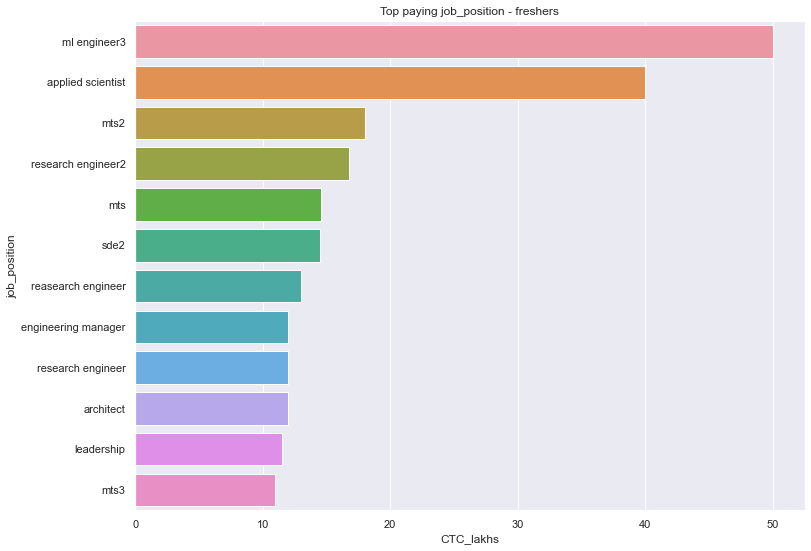

In [187]:
df_mv_freshers=df_dct.copy()

condition_freshers=[0,1,2,3]

df_mv_freshers = df_mv_freshers[df_mv_freshers['exp_years'].isin(condition_freshers)]

df_mv_freshers = df_mv_freshers.groupby(by='job_position').median()['CTC_lakhs'].reset_index().sort_values('CTC_lakhs',ascending=False).head(12)

plt.figure(figsize=(12,9))

sns.barplot(data=df_mv_freshers, x='CTC_lakhs', y='job_position').set(title='Top paying job_position - freshers')

plt.show()

### Observations based on bivariate analysis

1. Variation of compensation wrto experience is nearly linear

2. Top paying job includes: Manager-data science, ml engineer, solutions architect and research positions

3. List of top paying companies have been generated

4. List of top paying companies for freshers (0-3 years experience) have been generated

5. Top paying job positions for freshers (0-3 years experience) includes: ml engineer, R&D position, Member of the Technical Staff and SDE



### Data processing for Unsupervised clustering

In [126]:
df_clust = df_dct.copy()

##### Since the data is highly skewed for  'CTC_lakhs', 'exp_years', log transform is applied for these features

In [128]:
# Applying the log transform

df_clust['CTC_lakhs_log']=np.log2(df_clust['CTC_lakhs'])

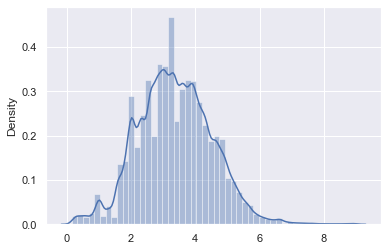

In [129]:
# Cross checking the log transform:

sns.distplot(x=df_clust['CTC_lakhs_log'])
plt.show()

In [130]:
# Applying the log transform

df_clust['exp_years_log']=np.log2(df_clust['exp_years'])
df_clust.replace([np.inf, -np.inf], 0, inplace=True)


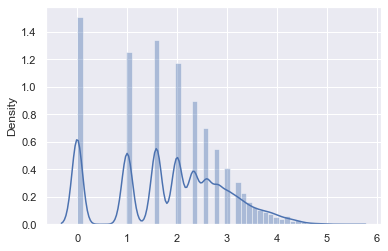

In [131]:
# Cross checking the log transform:

sns.distplot(x=df_clust['exp_years_log'])
plt.show()

In [132]:
# Mapping each company with corresponding median CTC and encoding the company name

company_dict = df_clust.groupby(by='company_hash').median()['CTC_lakhs_log'].to_dict()
df_clust['company_hash'] = df_clust['company_hash'].map(company_dict)

In [133]:
# Mapping each job_position with corresponding median CTC and encoding the job_position

job_position_dict = df_clust.groupby(by='job_position').median()['CTC_lakhs_log'].to_dict()
df_clust['job_position'] = df_clust['job_position'].map(job_position_dict)

In [134]:
# Dropping email-id's:

df_clust.drop(columns=['email_hash'],inplace=True)
df_clust.drop(columns=['CTC_lakhs','exp_years'],inplace=True)

### Now all the features have been converted to numerical features 

In [136]:
x=df_clust.copy()

In [137]:
cols=x.columns

In [138]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [139]:
x = pd.DataFrame(x, columns=[cols])

###   K- means clustering


##### K- means clustering with  arbitrary value = 4

In [157]:
from sklearn.cluster import KMeans

k = 4 
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(x)

In [158]:
# Labels of different clusters

y_pred

array([2, 3, 1, ..., 0, 2, 2])

In [159]:
# Coordinates of the 3 clusters

kmeans.cluster_centers_

array([[ 6.48703157e-01, -1.05094967e+00,  5.87767639e-01,
        -1.15927316e-01, -7.80270890e-01, -6.62270696e-01,
        -4.73712749e-01,  1.00866555e+00,  9.72579431e-01,
         1.00000000e+00],
       [-4.67952136e-01,  6.61686425e-01, -3.54137656e-01,
         4.03495258e-01,  1.02526844e+00,  1.14680244e+00,
         1.00852150e+00, -8.99340581e-01, -6.30883743e-01,
         2.00000000e+00],
       [-5.99777743e-01,  3.86131849e-01, -3.07280776e-01,
         1.75473144e-01, -4.97796458e-01, -7.35884305e-01,
        -5.88472756e-01, -3.13125415e-01, -2.94169359e-01,
        -8.94839758e-14],
       [ 6.91295090e-01,  2.21215124e-02,  1.33163270e-01,
        -5.81554181e-01,  8.48470079e-01,  9.85935584e-01,
         6.17480888e-01,  1.54787500e-01, -1.13214076e-01,
         1.87921754e+00]])

In [160]:
# Getting the inertia/WCSS score

kmeans.inertia_

782245.3791523719

### Visualizing the clusters

In [161]:
x['label'] = kmeans.labels_
x.head(7)

,company_hash,orgyear,job_position,ctc_updated_year,Tier,Class,Designation,CTC_lakhs_log,exp_years_log,label
0,0.09309,0.324202,-1.221703,0.363489,0.030885,-0.932499,-0.679138,0.084940,0.110214,2
1,0.09309,-0.155639,-1.221703,-1.161099,0.030885,1.294938,1.701675,0.050380,0.110214,3
2,0.09309,1.043963,0.535110,0.363489,1.150961,1.294938,-0.679138,-0.900483,-1.635557,1
3,0.09309,-0.155639,0.535110,-1.161099,1.150961,-0.932499,-0.679138,-0.034180,0.110214,2
4,0.09309,0.564122,0.510445,0.363489,-1.089190,-0.932499,-0.679138,0.629005,-0.252066,2
5,0.09309,0.564122,-0.344580,1.125782,1.150961,-0.932499,-0.679138,-0.672615,0.110214,2
6,0.09309,-0.155639,-1.007790,-0.398805,1.150961,-0.932499,-0.679138,-0.313067,0.391220,2


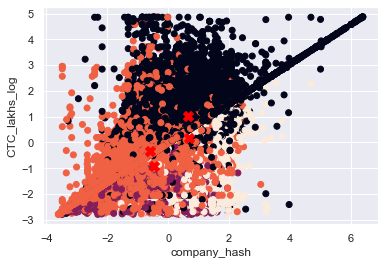

In [162]:
def viz_clusters(kmeans):
 plt.scatter(x['company_hash'], x['CTC_lakhs_log'], c=x['label'])
 plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 7],
 color="red",
 marker="X",
 s=100)
 plt.xlabel('company_hash')
 plt.ylabel('CTC_lakhs_log')

viz_clusters(kmeans)

##### Calculating ineria for different k values

In [163]:
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=33).fit(x)
 for k in range(1, 33, 3)]

inertias = [model.inertia_ for model in kmeans_per_k]

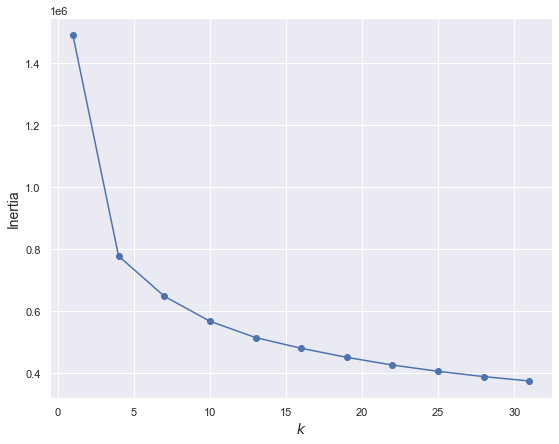

In [164]:
# Plotting the inertias

plt.figure(figsize=(9, 7))
plt.plot(range(1, 33, 3), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

### NOTE!

    - Elbow point is around 4 (k=4)

### Hierarchical Clustering

In [165]:
# Creating a small sample from the existing scaled dataframe

x_h = x.sample(frac=0.12)
x_h.shape

(17621, 10)

In [166]:
x_h

,company_hash,orgyear,job_position,ctc_updated_year,Tier,Class,Designation,CTC_lakhs_log,exp_years_log,label
108457,-0.599684,-1.115320,0.535110,1.125782,-1.089190,-0.932499,-0.679138,-0.479956,1.384131,0
71519,0.280290,0.804043,-0.031436,-0.398805,1.150961,1.294938,-0.679138,-0.034180,-1.635557,3
49515,-0.599684,0.564122,-0.031436,0.363489,-1.089190,-0.932499,0.511269,-0.009431,-0.252066,2
101092,1.494744,-0.155639,0.535110,0.363489,-1.089190,-0.932499,-0.679138,1.759404,0.620819,0
102824,-0.487045,-0.155639,-1.221703,0.363489,-1.089190,-0.932499,-0.679138,-0.393728,0.620819,2
...,...,...,...,...,...,...,...,...,...,...
40372,-0.498002,0.804043,0.535110,-0.398805,1.150961,1.294938,1.701675,-1.311051,-1.635557,1
23756,0.749964,-0.155639,0.535110,-0.398805,0.030885,0.181219,0.511269,0.553235,0.391220,3
13570,-1.149014,1.283883,-1.221703,1.125782,0.030885,0.181219,-0.679138,-0.900483,-1.635557,2
72841,0.123255,0.084282,-0.344580,-2.685687,1.150961,1.294938,1.701675,-0.165861,-1.635557,3


In [154]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

### Plotting the dendrogram

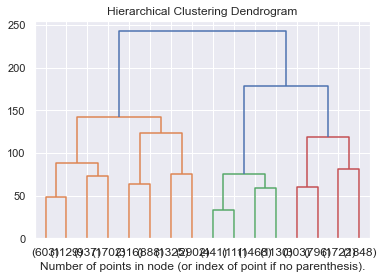

In [173]:
def plot_dendrogram(model, **kwargs):
    
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



X = x_h.iloc[:, :-1]

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
# plt.figure(figsize=(12,8))
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

##### AgglomerativeClustering

In [174]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
y_pred = hc.fit_predict(x_h.iloc[:, :-1])

In [177]:
# New label added to the existing dataframe

x_h['hier_labels'] = y_pred


In [178]:
x_h

,company_hash,orgyear,job_position,ctc_updated_year,Tier,Class,Designation,CTC_lakhs_log,exp_years_log,label,hier_labels
108457,-0.599684,-1.115320,0.535110,1.125782,-1.089190,-0.932499,-0.679138,-0.479956,1.384131,0,1
71519,0.280290,0.804043,-0.031436,-0.398805,1.150961,1.294938,-0.679138,-0.034180,-1.635557,3,0
49515,-0.599684,0.564122,-0.031436,0.363489,-1.089190,-0.932499,0.511269,-0.009431,-0.252066,2,3
101092,1.494744,-0.155639,0.535110,0.363489,-1.089190,-0.932499,-0.679138,1.759404,0.620819,0,1
102824,-0.487045,-0.155639,-1.221703,0.363489,-1.089190,-0.932499,-0.679138,-0.393728,0.620819,2,1
...,...,...,...,...,...,...,...,...,...,...,...
40372,-0.498002,0.804043,0.535110,-0.398805,1.150961,1.294938,1.701675,-1.311051,-1.635557,1,3
23756,0.749964,-0.155639,0.535110,-0.398805,0.030885,0.181219,0.511269,0.553235,0.391220,3,1
13570,-1.149014,1.283883,-1.221703,1.125782,0.030885,0.181219,-0.679138,-0.900483,-1.635557,2,0
72841,0.123255,0.084282,-0.344580,-2.685687,1.150961,1.294938,1.701675,-0.165861,-1.635557,3,0


### Insights

1. Most of the candidates either has rating 1 or 3 for all the flags(Designation, Tier and Class)

2. Point 1 indicates that that, either they are top performers or candidates that really need tech upskillling

3. Course should be designed to meet such candidates(mentioned in point 2)

4. Companies are willing to pay high compensation for the right candiates irrespective of their experience

5. In addition to existing tech job profiles, upcoming job profiles include Data science, machine learning, R&D profiles and related fields


### Recommendations

1. Candidates should be judged based on the flags created (Designation, Tier and Class)
2. Lower rating in Designation or Class indicate the scope for upskilling
3. High compensation can be seen as an motivation for the candidates who already have high flag rating. Course curicullum should be designed to meet such requirements
4. R&D related topics should be included in the curicullum
5. Data Science related positions are one of the most paid and more focus should be given to it

### JMJ+